In [4]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as img
from sklearn.decomposition import PCA
import os
from PIL import Image
K = 50

In [5]:
images = []
for image_file in os.listdir('Train1'):
    image = Image.open('Train1/' + image_file).convert('L').resize((100, 100))
    if image is not None:
        images.append(np.asarray(image).flatten())

images = np.array(images)

print(images)

[[129 126 133 ... 130 130 130]
 [126 130 129 ... 129 129 129]
 [127 131 129 ... 130 130 130]
 ...
 [130 130 130 ... 130 130 130]
 [128 128 130 ... 129 129 129]
 [127 131 129 ... 129 129 129]]


In [6]:
mean = np.mean(images,axis=0)
data = images - mean
pca = PCA(n_components=K)
transformed = pca.fit_transform(data)

In [7]:
print("Explained variance ratio:\n", pca.explained_variance_ratio_)

Explained variance ratio:
 [0.14132514 0.12015377 0.05807944 0.04900581 0.03759132 0.03236193
 0.02742219 0.02581336 0.02260193 0.01942624 0.01680861 0.01371117
 0.01287981 0.01261933 0.01178917 0.01127303 0.01083469 0.00968499
 0.00941363 0.00874725 0.00813066 0.00795785 0.00767311 0.00654575
 0.00640934 0.00623706 0.00552719 0.00521545 0.00499319 0.00464871
 0.00426982 0.00420582 0.00408191 0.00385979 0.00376125 0.00359164
 0.00357673 0.00343306 0.00330205 0.0032105  0.00308508 0.00292014
 0.00284926 0.00273523 0.0027182  0.00254875 0.0025195  0.00246772
 0.00237356 0.00227697]


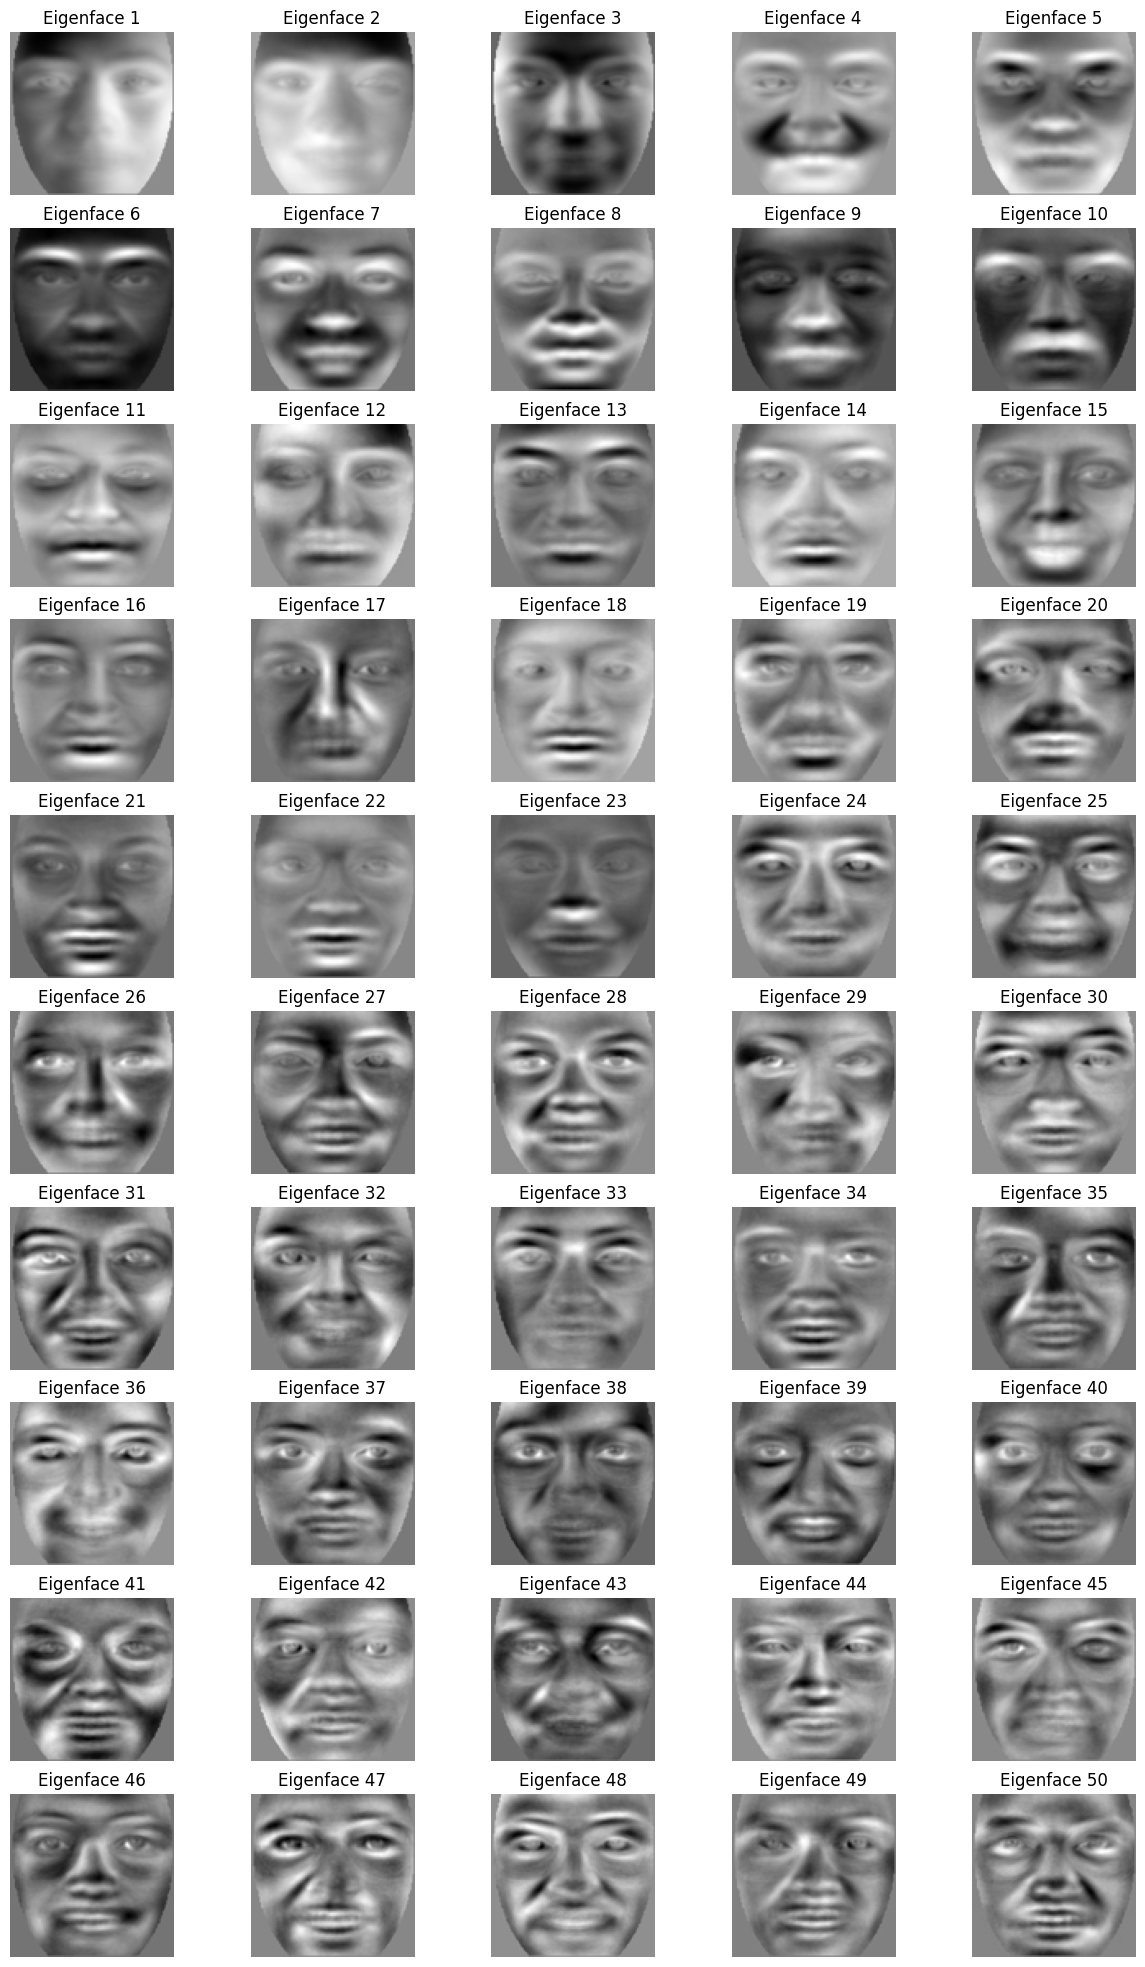

In [8]:
fig, axes = plt.subplots(10, 5, figsize=(15, 25))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape((100, 100)), cmap='gray')
    ax.set_title(f"Eigenface {i+1}")
    ax.axis('off')

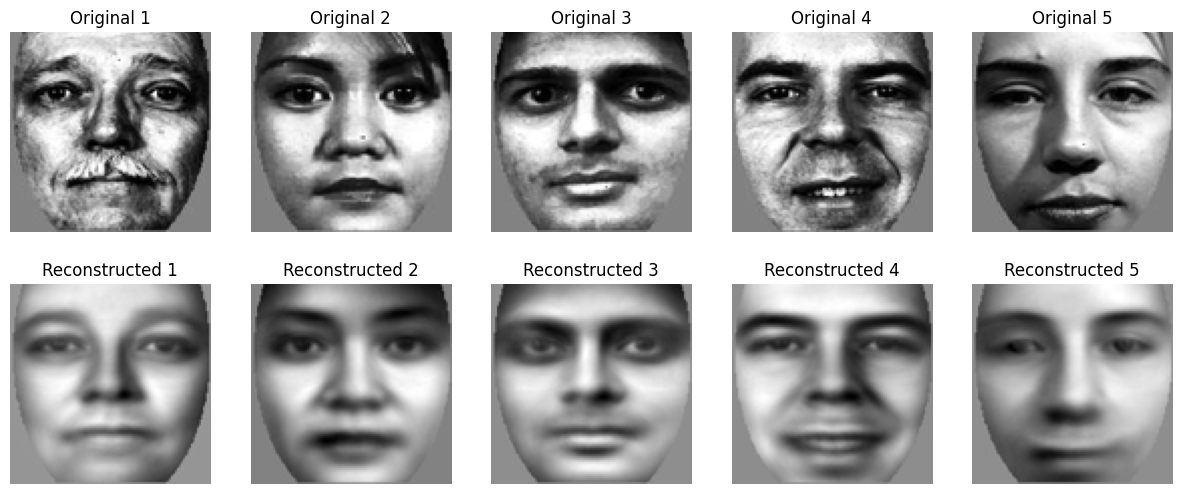

In [9]:
top_k_eigenfaces = pca.components_[:K]
reconstructed_faces = np.dot(transformed[:,:K], top_k_eigenfaces) + mean

fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(5):
        original_face = mean + data[i]
        axes[0, i].imshow(original_face.reshape((100, 100)), cmap='gray')
        axes[0, i].set_title(f"Original {i+1}")
        axes[0, i].axis('off')
        reconstructed_face = reconstructed_faces[i]
        axes[1, i].imshow(reconstructed_face.reshape((100, 100)), cmap='gray')
        axes[1, i].set_title(f"Reconstructed {i+1}")
        axes[1, i].axis('off')

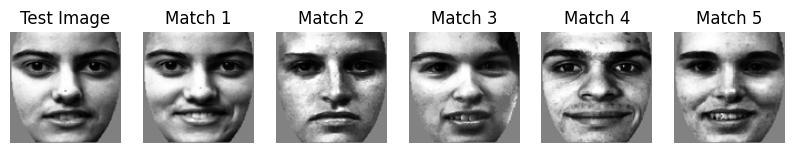

In [12]:
test_image = Image.open('Test1/00238fb010.940128.jpg').convert('L').resize((100, 100))
test_image_vector = np.asarray(test_image).flatten()
centered_test_image = test_image_vector - mean
test_image_transformed = pca.transform(centered_test_image.reshape(1, -1))

distances = np.sqrt(((transformed[:,:K] - test_image_transformed) ** 2).sum(axis=1))

closest_indices = np.argsort(distances)[:5]

plt.figure(figsize=(10, 2))
plt.subplot(1, 6, 1)
plt.imshow(test_image_vector.reshape((100, 100)), cmap='gray')
plt.title("Test Image")
plt.axis('off')

for i, idx in enumerate(closest_indices, start=1):
        plt.subplot(1, 6, i+1)
        plt.imshow(images[idx].reshape((100, 100)), cmap='gray')
        plt.title(f"Match {i}")
        plt.axis('off')